In [12]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%precision 3
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 正規分布と応用

## 正規分布の数式

$$
\mathcal{N(x|\mu, \sigma^2)}
 = \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [23]:
# 確率密度
x = 3
mu = 4
sigma = 0.8

by_formula = 1 / (sp.sqrt(2 * sp.pi * sigma**2)) * sp.exp(- (((x-mu)**2)/(2*sigma**2)))
norm_dist = stats.norm(loc=4, scale=0.8)

print(f'by formula : {by_formula}')
print(f'by function: {norm_dist.pdf(x = 3)}')

by formula : 0.22831135673627742
by function: 0.2283113567362774


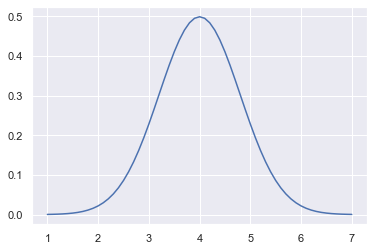

In [24]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8))

## 累積分布関数

確率変数`X`に対して、`x`を実数とするときのように表される`F(X)`を**累積分布関数**あるいは、**分布関数**と呼ぶ

$$
F(X) = P(X \le x)
$$

確率変数Xが`3`以上の確率は以下の数式で求めることができる
$$
P(X \le 3) = \int^{3}_{-\infty}\frac{1}{\sqrt{2\sigma^2}}\exp^{-\frac{(x-\mu)^2}{2\sigma^2}} dx
$$



In [25]:
# cdf=Cumulative Distribution Function
print(stats.norm.cdf(loc=4, scale=0.8, x=3))
print(stats.norm.cdf(loc=4, scale=0.8, x=4))

0.10564977366685535
0.5


## 下側確率とパーセント点

- 下側確率: データがある値以下になる確率のこと
- パーセント点: ある角になる基準値のこと


In [36]:
# ppf Percent Point Function
# N(x | 4, 0.8^2) であるときに、下側確率が2.5%となるパーセント点を求めろ
print(f'下側確率が2.5%となるパーセント点: {stats.norm.ppf(loc=4, scale=0.8, q=0.025)}')
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
print(f'下側確率が10.564977366685535%となるパーセント点: {stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)}')
print(f'下側確率が50%となるパーセント点: {stats.norm.ppf(loc=4, scale=0.8, q=0.5)}')

下側確率が2.5%となるパーセント点: 2.4320288123679563
下側確率が10.564977366685535%となるパーセント点: 3.0000000000000004
下側確率が50%となるパーセント点: 4.0


## 標準正規分布

平均0、分散(標準偏差)1の正規分布のこと
$$ \mathcal{N(x | 0, 1)} $$


## t値の正規分布

- t値は、以下のように計算される統計量

$$ t = \frac{\hat{\mu}-\mu}{\hat{\sigma}/\sqrt{N}}
 = \frac{標本平均-母平均}{標準誤差} $$

- 普遍性が満たされるため、標本平均の平均値は、母平均と等しくなる
- 標準誤差で割っているにもかかわらず、分母の裾が少し広くなっている
  - 分散が1よりも大きくなっている
  - これは、標本から計算された標準誤差で割っているため

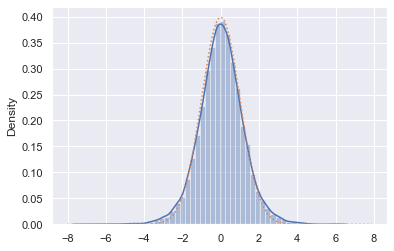

In [39]:
np.random.seed(1)
N = 10000
t_value_array = np.zeros(N)

norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, N):
    sample = norm_dist.rvs(size=10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof=1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

# t値のヒストグラム
sns.distplot(t_value_array)
x = np.arange(start=-8, stop=8, step=0.1)
# 正規分布の確率密度
plt.plot(x, stats.norm.pdf(x=x), linestyle='dotted')

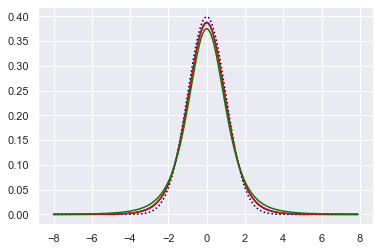

In [48]:
# 標準正規分布
plt.plot(x, stats.norm.pdf(x=x, loc=0, scale=1), linestyle='dotted', color='black')
# t分布(df=自由度)
plt.plot(x, stats.t.pdf(x=x, df=9, loc=0, scale=1), color='blue')
plt.plot(x, stats.t.pdf(x=x, df=8, loc=0, scale=1), color='red')
plt.plot(x, stats.t.pdf(x=x, df=4, loc=0, scale=1), color='green')

# t分布の意義

- 母分散がわかっていない状況でも、標本平均の分布について言及することが可能になる
- 「標本から計算された標準誤差」で標本平均を標準化した時の結果がt分布に従うという事実を使うことで、得られた標本平均に関する不確実性を見積もることが可能になる